In [228]:
import numpy as np
import scipy as sp
import scipy.stats as st
import sys,json,os
sys.path.append('../..')
import matplotlib.pyplot as plt
import Project.profiles as pp
import Project.new_profiles as pnp
import Project.plot_assist as pa
from Project.constants import Constants as pc
import matplotlib
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['mathtext.fontset'] = 'dejavuserif'
cmap1 = plt.get_cmap('RdBu')
cmap2 = plt.get_cmap('BrBG')
cmap = pa.truncate_colormap(plt.get_cmap('BrBG_r'),0.55,0.9)
red = cmap1(0.1)
blu = cmap1(0.9)
brw = cmap2(0.1)
bgn = cmap2(0.9)

In [29]:
def v2kpc(r,vc):
    try:
        lowi = np.where(r == np.max(r[r <= 2]))[0][0]
    except:
        if r[0] > 2:
            r = np.array([ri for ri in [0,*r]])
            vc = np.array([vi for vi in [0,*vc]])
            lowi = np.where(r == np.max(r[r <= 2]))[0][0]
    try:
        higi = np.where(r == np.min(r[r >= 2]))[0][0]
    except:
        if r[-1] < 2:
            return vc[-1]
        else:
            print ('some other problem')
    rlow,vlow = r[lowi],vc[lowi]
    rhig,vhig = r[higi],vc[higi]
    if rlow == 2:
        return vlow
    elif rhig == 2:
        return vhig
    else:
        m = (vhig-vlow)/(rhig-rlow)
        c = vlow - m*rlow
        v2 = m*2. + c
        return v2
    
def get_diversity(galfile,model,gald):
    vmax,v2,lm,lms,lsig,lz = [],[],[],[],[],[]
    for lm_i in range(15):
        for rn_i in range(15):
            for i in range(50):
                gal = '%i_%i_%s_gal_%i'%(lm_i,rn_i,model,i)
                data = np.loadtxt(galfile+'/%s.dat'%gal)
                vmaxi = np.max(data[:,1])
                v2i = v2kpc(data[:,0],data[:,1])
                vmax.append(vmaxi)
                v2.append(v2i)
                lm.append(gald[gal]['original']['lm'])
                lms.append(gald[gal]['original']['lmstar'])
                lsig.append(gald[gal]['original']['lsig']-6)
                lz.append(gald[gal]['core_fit']['lnZ']-gald[gal]['cusp_fit']['lnZ'])
    return np.array(vmax),np.array(v2),np.array(lm),np.array(lms),np.array(lsig),np.array(lz)

In [ ]:
def plot_diversity(vmax,v2,cmap_array,cmap = plt.get_cmap('plasma'),
                   cblabel = '$\mathrm{log}\,(M_{200}\,/\,\mathrm{M_{\odot}}}$)',v_min=None,v_max = None):
    fig,axs = plt.subplots(1,2,figsize = (16,6),gridspec_kw = {'wspace':0.2})
    ax1,ax2 = axs
    ax1.scatter(vmax[0],v2[0], c = cmap_array[0], cmap = cmap, alpha = 1,vmin = v_min,vmax = v_max)
    sc = ax2.scatter(vmax[1],v2[1], c = cmap_array[1], cmap = cmap, alpha = 1,vmin = v_min,vmax=v_max)
    cb = fig.colorbar(sc, ax=axs.ravel().tolist(),pad = 0.02)
    cb.set_label(label = cblabel,size = 13)

    clr = plt.get_cmap('viridis')(0.5)
    ticks = [10,50,100,200,500]
    for ax in axs:
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.scatter(vm_R,v2_R,color = clr,marker = 's',lw = 1.5,facecolor = 'none')
        ax.set_xlim(9e0,800)
        ax.set_ylim(9e0,800)
        ax.plot(ax.get_xlim(),ax.get_ylim(),c = 'k',lw = 2)
        ax.tick_params(direction = 'in',which = 'both',width = 1,length = 2,top=True,right=True)
        ax.tick_params(which = 'major',length = 4,width = 1.4)
        ax.set_yticks(ticks)
        ax.set_yticklabels(ticks)
        ax.set_xticks(ticks)
        ax.set_xticklabels(ticks)
        ax.set_xlabel('$V_{\mathrm{max}}$ $(\mathrm{km\,s^{-1})}$',size = 13)
        ax.set_ylabel('$V_c\,(2\,\mathrm{kpc})$ $(\mathrm{km\,s^{-1}})$',size = 13)
    return fig,ax1,ax2

In [30]:
sparcd = json.load(open('../Output/sparc_new_dict.json','r'))
bry_2 = json.load(open('../../sim_RC_12/Output/resdicts/Bry_2sig_dict.json','r'))
bry_1 = json.load(open('../../sim_RC_12/Output/resdicts/Bry_1sig_dict.json','r'))
bry_p5 = json.load(open('../../sim_RC_12/Output/resdicts/Bry_p5sig_dict.json','r'))

In [181]:
v2_R = []
vl_R = []
vm_R = []
lnZ = []
gals = []
prior = 'lcdm'
for gal in sparcd[prior]:
    data = np.loadtxt('../../Accessory/RotCurvs/%s_rotmod.dat'%gal)
    r = data[:,0]
    vc = data[:,1]
    v2_R.append(v2kpc(r,vc))
    vl_R.append(vc[-1])
    vm_R.append(np.max(np.array(vc)))
    lnZ.append(sparcd[prior][gal]['core_fit']['lnZ'] - sparcd[prior][gal]['cusp_fit']['lnZ'])
    gals.append(gal)

In [31]:
vmx_2n,vin_2n,lm_2n,ls_2n,lsig_2n,lz_2n = get_diversity('../../sim_RC_12/Output/Mock_gals/Bry_2sig_gals/','N',bry_2)
vmx_2c,vin_2c,lm_2c,ls_2c,lsig_2c,lz_2c = get_diversity('../../sim_RC_12/Output/Mock_gals/Bry_2sig_gals/','S',bry_2)

In [32]:
vmax_1n,v2_1n,lm_1n,ls_1n,lsig_1n,lz_1n = get_diversity('../../sim_RC_12/Output/Mock_gals/Bry_1sig_gals/','N',bry_1)
vmax_1c,v2_1c,lm_1c,ls_1c,lsig_1c,lz_1c = get_diversity('../../sim_RC_12/Output/Mock_gals/Bry_1sig_gals/','S',bry_1)

In [33]:
vmax_p5n,v2_p5n,lm_p5n,ls_p5n,lsig_p5n,lz_p5n = get_diversity('../../sim_RC_12/Output/Mock_gals/Bry_p5sig_gals/','N',bry_p5)
vmax_p5c,v2_p5c,lm_p5c,ls_p5c,lsig_p5c,lz_p5c = get_diversity('../../sim_RC_12/Output/Mock_gals/Bry_p5sig_gals/','S',bry_p5)

Text(0, 0.5, '$V_c\\,(2\\,\\mathrm{kpc})$ $(\\mathrm{km\\,s^{-1}})$')

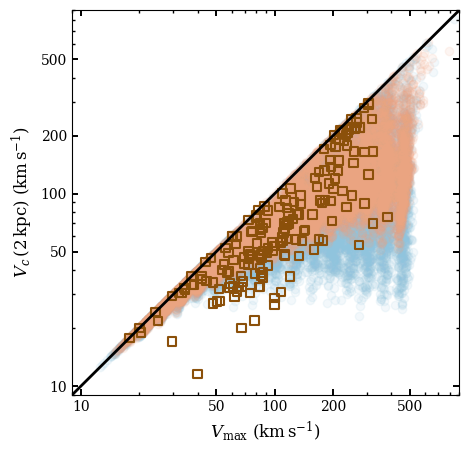

In [69]:
fig,ax = plt.subplots(1,1,figsize = (5,5))
ax.scatter(vmx_2c,vin_2c, color = blu, alpha = 0.1, marker = 'o')
ax.scatter(vmx_2n,vin_2n, color = red, alpha = 0.1, marker = 'o')

ticks = [10,50,100,200,500]
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(9e0,9e2)
ax.set_ylim(9e0,9e2)
ax.plot(ax.get_xlim(),ax.get_ylim(),c = 'k',lw = 2)
ax.tick_params(direction = 'in',which = 'both',width = 1,length = 2,top=True,right=True)
ax.tick_params(which = 'major',length = 4,width = 1.4)
ax.set_yticks(ticks)
ax.set_yticklabels(ticks)
ax.set_xticks(ticks)
ax.set_xticklabels(ticks)
ax.scatter(vm_R,v2_R,color = brw,marker = 's',lw = 1.5,facecolor = 'none')
ax.set_xlabel('$V_{\mathrm{max}}$ $(\mathrm{km\,s^{-1})}$',size = 12)
ax.set_ylabel('$V_c\,(2\,\mathrm{kpc})$ $(\mathrm{km\,s^{-1}})$',size = 12)

In [182]:
label_gals_n,label_gals_c = [],[]
for i in range(len(gals)):
    gal,vm,v2 = gals[i],vm_R[i],v2_R[i]
    if (50 < vm < 100) and (v2 < 25):
        print (gal)
        label_gals_c.append(gal)
        label_gals_n.append(gal)
    if (25 < vm < 50) and (v2 < 20):
        print (gal)
        label_gals_c.append(gal)
        label_gals_n.append(gal)
    if (95 < vm < 110) and (v2 < 32):
        print ('--',gal)
        label_gals_n.append(gal)
    if (110 < vm < 130) and (v2 < 40):
        print ('---',gal)
        label_gals_n.append(gal)

F563-V1
--- F568-3
F574-2
IC2574
-- UGC00634
-- UGC05005
UGC05750
-- UGC05999


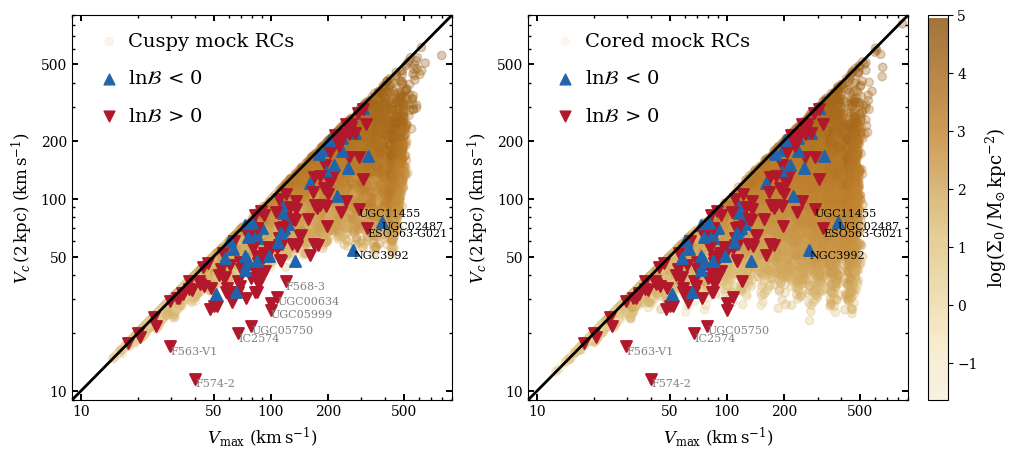

In [186]:
fig, axs = plt.subplots(1,2, figsize = (13,5), gridspec_kw = {'wspace':0.2})
ax1,ax2 = axs
ax1.scatter(vmx_2n,vin_2n, c = lsig_2n, cmap = cmap, alpha = 0.3, marker = 'o',label = 'Cuspy mock RCs')
ax2.scatter(vmx_2c,vin_2c, c = lsig_2c, cmap = cmap, alpha = 0.3, marker = 'o',label = 'Cored mock RCs')
sc = ax2.scatter(vmx_2c * 0,vin_2c*0, c = lsig_2c, cmap = cmap, alpha = 0.8, marker = 'o')
cb = fig.colorbar(sc, ax=axs.ravel().tolist(),pad = 0.02)
cb.set_ticks([-1,0,1,2,3,4,5])
cb.set_label(label = '$\mathrm{log}(\Sigma_0\,/\,\mathrm{M_{\odot}\,kpc^{-2}})$',size = 13)

ticks = [10,50,100,200,500]
for ax in axs:
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim(9e0,9e2)
    ax.set_ylim(9e0,9e2)
    ax.plot(ax.get_xlim(),ax.get_ylim(),c = 'k',lw = 2)
    ax.tick_params(direction = 'in',which = 'both',width = 1,length = 2,top=True,right=True)
    ax.tick_params(which = 'major',length = 4,width = 1.4)
    ax.set_yticks(ticks)
    ax.set_yticklabels(ticks)
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks)
    ax.set_xlabel('$V_{\mathrm{max}}$ $(\mathrm{km\,s^{-1})}$',size = 12)
    ax.set_ylabel('$V_c\,(2\,\mathrm{kpc})$ $(\mathrm{km\,s^{-1}})$',size = 12)
    for i in range(len(vm_R)):
        mrk = '^' if lnZ[i] < 0 else 'v'
        clr = blu if lnZ[i] < 0 else red
        ax.scatter(vm_R[i],v2_R[i],color = clr,s = 60, marker = mrk,lw = 1.5,facecolor = clr)

    ax.scatter(0,0,color = blu, marker = '^', s = 60, label = 'ln$\mathcal{B}$ < 0')
    ax.scatter(0,0,color = red, marker = 'v', s = 60, label = 'ln$\mathcal{B}$ > 0')
    # ax.scatter(1e4,1e4,color = clr,marker = 'v',lw = 1,alpha = 0.8,s = 50,label = 'SPARC')
    ax.legend(loc = 'upper left', prop={'size':14},framealpha = 0,labelspacing = 1,handletextpad= 0)
    
clr2 = 'grey'#plt.get_cmap('Reds')(0.95)
for i in range(len(gals)):
    gal = gals[i]
    if gal == 'UGC05005':
        continue
    vm,v2 = vm_R[i],v2_R[i]
    if gal in label_gals_c:
        ax2.text(vm,v2,gal,size = 8, color = clr2,verticalalignment = 'top',alpha = 1)
    if gal in label_gals_n:
        ax1.text(vm,v2,gal,size = 8, color = clr2,verticalalignment = 'top',alpha = 1)
    if gal in ['UGC11455','UGC02487','ESO563-G021','NGC3992']:
        ax1.text(vm,v2,gal,size = 8, color = 'k', verticalalignment = 'top',alpha = 1)
        ax2.text(vm,v2,gal,size = 8, color = 'k', verticalalignment = 'top',alpha = 1)
plt.savefig('../Output/diversity/fig1.pdf',bbox_inches = 'tight',dpi = 300)

In [119]:
rc_p7 = json.load(open('../../sim_RC_12/Output/resdicts/Rc_p7_original.json','r'))
rc_p3 = json.load(open('../../sim_RC_12/Output/resdicts/Rc_p3_original.json','r'))
dmo = json.load(open('../../sim_RC_12/Output/resdicts/dmo_original.json','r'))
Bry_p25 = json.load(open('../../sim_RC_12/Output/resdicts/Bry_p25sig_original.json','r'))
Rd_1 = json.load(open('../../sim_RC_12/Output/resdicts/Rd_1_original.json','r'))
Rd_p5 = json.load(open('../../sim_RC_12/Output/resdicts/Rd_p5_original.json','r'))
Bry_2 = json.load(open('../../sim_RC_12/Output/resdicts/Bry_2sig_original.json','r'))
Bry_1 = json.load(open('../../sim_RC_12/Output/resdicts/Bry_1sig_original.json','r'))
Bry_p5 = json.load(open('../../sim_RC_12/Output/resdicts/Bry_p5sig_original.json','r'))
sig_shm = json.load(open('../../sim_RC_12/Output/resdicts/sig_SHM_original.json','r'))
rc_m1 = json.load(open('../../sim_RC_12/Output/resdicts/Rc_m1_original.json','r'))
rc_m2 = json.load(open('../../sim_RC_12/Output/resdicts/Rc_m2_original.json','r'))

In [120]:
def get_vmax_v2(gald,model,keys=[]):
    vmax,v2 = [],[]
    extras = {key:[] for key in keys}
    for gal in gald:
        if model in gal:
            vmax.append(gald[gal]['vmax'])
            v2.append(gald[gal]['v2'])
            for key in keys:
                extras[key].append(gald[gal][key])
    for key in extras.keys():
        extras[key] = np.array(extras[key])
    return np.array(vmax),np.array(v2), extras

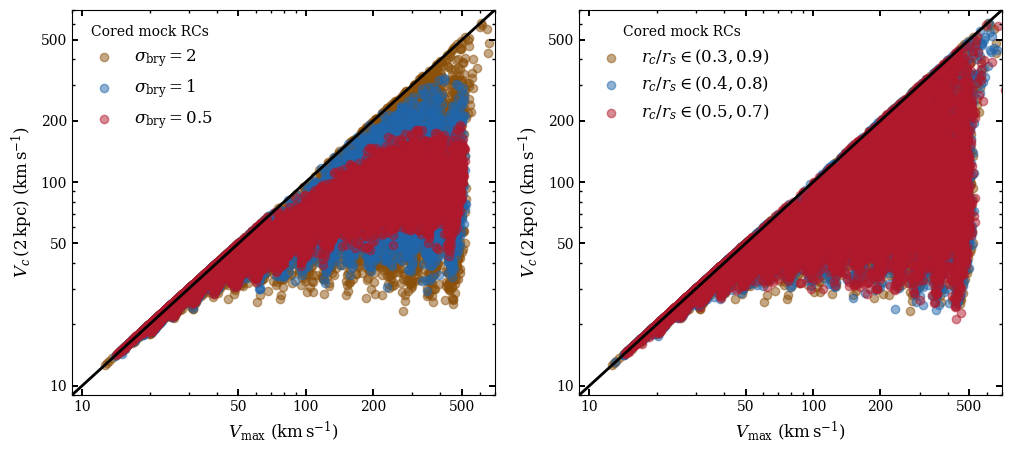

In [162]:
fig,axs = plt.subplots(1,2,figsize = (12,5),gridspec_kw = {'wspace':0.2})
ax2,ax1 = axs


c1 = brw
c2 = blu #plt.get_cmap('BrBG')(0.75)
c3 = red #plt.get_cmap('RdBu')(0.15)
mrk = 'o'

vm,v2,_ = get_vmax_v2(Bry_2,'S')
ax1.scatter(vm,v2, color = c1,marker = mrk,alpha = 0.5,
            label = '$r_c/r_s \in (0.3,0.9)$',edgecolor = c1)
vm,v2,_ = get_vmax_v2(rc_m1,'S')
ax1.scatter(vm,v2, color = c2,marker = mrk,alpha = 0.5,
            label = '$r_c/r_s \in (0.4,0.8)$',edgecolor = c2)
vm,v2,_ = get_vmax_v2(rc_m2,'S')
ax1.scatter(vm,v2, color = c3,marker = mrk,alpha = 0.5,
            label = '$r_c/r_s \in (0.5,0.7)$',edgecolor = c3)

vm,v2,_ = get_vmax_v2(Bry_2,'S')
ax2.scatter(vm,v2, color = c1,marker = mrk,alpha = 0.5,
            label = '$\sigma_{\mathrm{bry}} = 2$',edgecolor = c1)
vm,v2,_ = get_vmax_v2(Bry_1,'S')
ax2.scatter(vm,v2, color = c2,marker = mrk,alpha = 0.5,
            label = '$\sigma_{\mathrm{bry}} = 1$',edgecolor = c2)
vm,v2,_ = get_vmax_v2(Bry_p5,'S')
ax2.scatter(vm,v2, color = c3,marker = mrk,alpha = 0.5,
            label = '$\sigma_{\mathrm{bry}} = 0.5$',edgecolor = c3)

clr = (1,.64,0)
ticks = [10,50,100,200,500]
for ax in axs:
    ax.set_yscale('log')
    ax.set_xscale('log')
    # ax.scatter(vm_R,v2_R,color = clr,marker = 'o',lw = 0.8,alpha = 1,s = 10)
    ax.set_xlim(9e0,7e2)
    ax.set_ylim(9e0,7e2)
    ax.plot(ax.get_xlim(),ax.get_ylim(),c = 'k',lw = 2)
    ax.tick_params(direction = 'in',which = 'both',width = 1,length = 2,top=True,right=True)
    ax.tick_params(which = 'major',length = 4,width = 1.4)
    ax.set_yticks(ticks)
    ax.set_yticklabels(ticks)
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks)
    ax.set_xlabel('$V_{\mathrm{max}}$ $(\mathrm{km\,s^{-1})}$',size = 12)
    ax.set_ylabel('$V_c\,(2\,\mathrm{kpc})$ $(\mathrm{km\,s^{-1}})$',size = 12)
    # ax.scatter(1e4,1e4,color = clr,marker = 'o',lw = 1,label = 'SPARC',alpha = 0.8,s = 40)
    ax.legend(loc = 'upper left', prop={'size':12},framealpha = 0,labelspacing = .5,markerscale = 1,title = 'Cored mock RCs')
    
plt.savefig('../Output/diversity/fig2.pdf',bbox_inches = 'tight',dpi = 300)

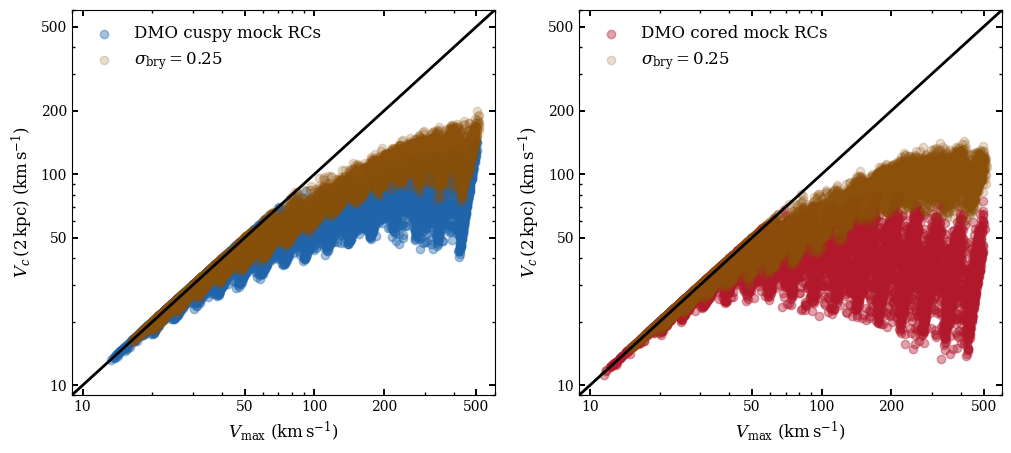

In [160]:
fig,axs = plt.subplots(1,2,figsize = (12,5),gridspec_kw = {'wspace':0.2})
ax1,ax2 = axs

vm,v2,_ = get_vmax_v2(dmo,'N')
ax1.scatter(vm,v2, color = blu, marker = 'o',alpha = 0.4,label = 'DMO cuspy mock RCs')
vm,v2,_ = get_vmax_v2(Bry_p25,'N')
ax1.scatter(vm,v2, color = brw, marker = 'o',alpha = 0.2,label = '$\sigma_{\mathrm{bry}} = 0.25$')
vm,v2,_ = get_vmax_v2(dmo,'S')
ax2.scatter(vm,v2, color = red, marker = 'o',alpha = 0.4,label = 'DMO cored mock RCs')
vm,v2,_ = get_vmax_v2(Bry_p25,'S')
ax2.scatter(vm,v2, color = brw, marker = 'o',alpha = 0.2,label = '$\sigma_{\mathrm{bry}} = 0.25$',)

clr = (1,.64,0)
ticks = [10,50,100,200,500]
for ax in axs:
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim(9e0,6e2)
    ax.set_ylim(9e0,6e2)
    ax.plot(ax.get_xlim(),ax.get_ylim(),c = 'k',lw = 2)
    ax.tick_params(direction = 'in',which = 'both',width = 1,length = 2,top=True,right=True)
    ax.tick_params(which = 'major',length = 4,width = 1.4)
    ax.set_yticks(ticks)
    ax.set_yticklabels(ticks)
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks)
    ax.set_xlabel('$V_{\mathrm{max}}$ $(\mathrm{km\,s^{-1})}$',size = 12)
    ax.set_ylabel('$V_c\,(2\,\mathrm{kpc})$ $(\mathrm{km\,s^{-1}})$',size = 12)
    ax.legend(loc = 'upper left', prop={'size':12},framealpha = 0,labelspacing = 0.5,markerscale = 1)
    
plt.savefig('../Output/diversity/fig3.pdf',bbox_inches = 'tight',dpi = 300)

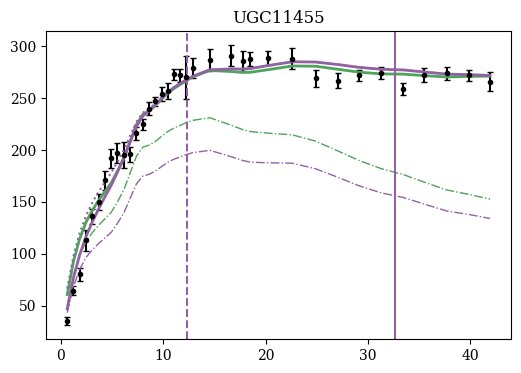

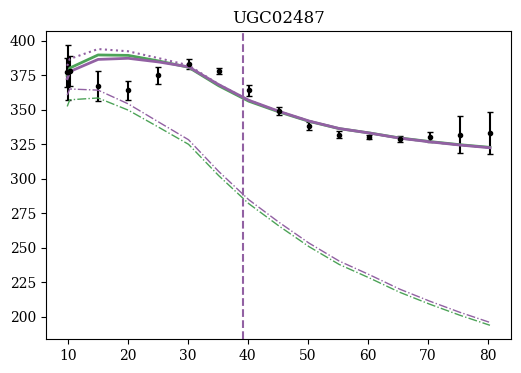

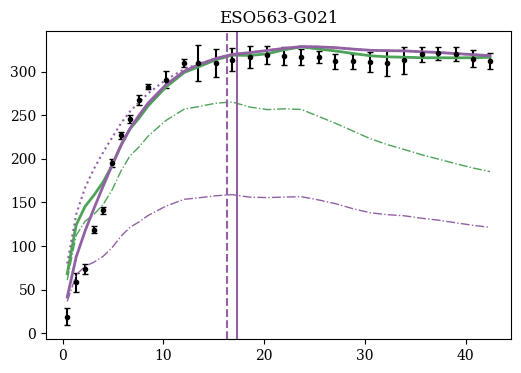

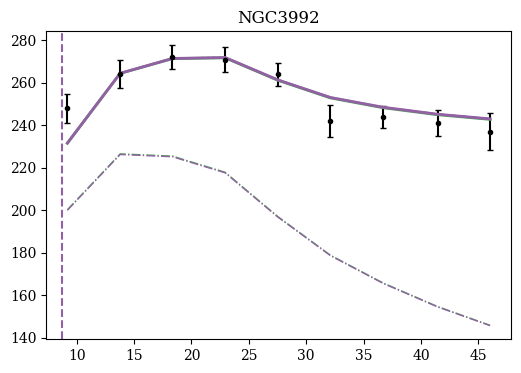

In [189]:
for gal in ['UGC11455','UGC02487','ESO563-G021','NGC3992']:
    ax = pa.plot_RC(gal,sparcd,prior = 'lcdm')
    ax.set_title(gal)

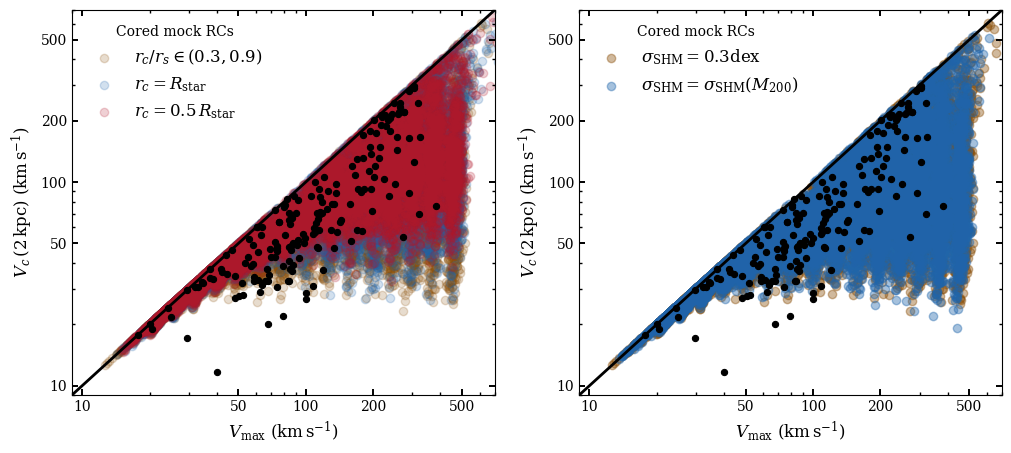

In [207]:
fig,axs = plt.subplots(1,2,figsize = (12,5),gridspec_kw = {'wspace':0.2})
ax1,ax2 = axs

mrk = 'o'

vm,v2,_ = get_vmax_v2(Bry_2,'S')
ax1.scatter(vm,v2, color = brw,marker = mrk,alpha = 0.2,label = '$r_c/r_s \in (0.3,0.9)$')
vm,v2,_ = get_vmax_v2(Rd_1,'S')
ax1.scatter(vm,v2, color = blu,marker = mrk,alpha = 0.2,label = '$r_c = R_{\mathrm{star}}$')
vm,v2,_ = get_vmax_v2(Rd_p5,'S')
ax1.scatter(vm,v2, color = red,marker = mrk,alpha = 0.2,label = '$r_c = 0.5\,R_{\mathrm{star}}$')

vm,v2,_ = get_vmax_v2(Bry_2,'S')
ax2.scatter(vm,v2, color = brw,marker = mrk,alpha = 0.4,label = '$\sigma_{\mathrm{SHM}} = 0.3$dex')
vm,v2,_ = get_vmax_v2(sig_shm,'S')
ax2.scatter(vm,v2, color = blu,marker = mrk,alpha = 0.4,
            label = '$\sigma_{\mathrm{SHM}} = \sigma_{\mathrm{SHM}}(M_{200})$')


clr = (1,.64,0)
ticks = [10,50,100,200,500]
for ax in axs:
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.scatter(vm_R,v2_R,color = 'k',marker = 'o',lw = 0.8,alpha = 1,s = 20)
    ax.set_xlim(9e0,7e2)
    ax.set_ylim(9e0,7e2)
    ax.plot(ax.get_xlim(),ax.get_ylim(),c = 'k',lw = 2)
    ax.tick_params(direction = 'in',which = 'both',width = 1,length = 2,top=True,right=True)
    ax.tick_params(which = 'major',length = 4,width = 1.4)
    ax.set_yticks(ticks)
    ax.set_yticklabels(ticks)
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks)
    ax.set_xlabel('$V_{\mathrm{max}}$ $(\mathrm{km\,s^{-1})}$',size = 12)
    ax.set_ylabel('$V_c\,(2\,\mathrm{kpc})$ $(\mathrm{km\,s^{-1}})$',size = 12)
    # ax.scatter(1e4,1e4,color = clr,marker = 'o',lw = 1,label = 'SPARC',alpha = 0.8,s = 40)
    ax.legend(loc = 'upper left', prop={'size':12},framealpha = 0,labelspacing = .5,markerscale = 1,title = 'Cored mock RCs')
    
plt.savefig('../Output/diversity/fig4.pdf',bbox_inches = 'tight',dpi = 300)

10.23 67.5
22.85 78.9


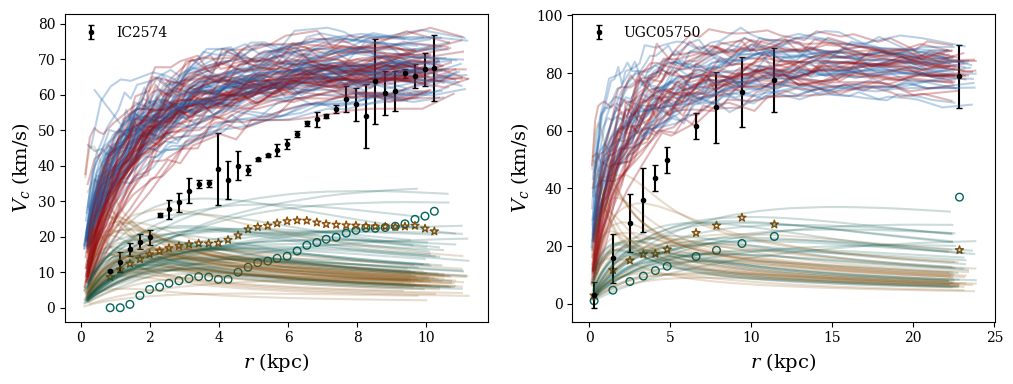

In [211]:
fig,axs = plt.subplots(1,2,figsize = (12,4))
gals = ['IC2574','UGC05750']
red = plt.get_cmap('Reds')(0.9)
lightred = (1.,.647,0)
blue = plt.get_cmap('Blues')(0.9)
lightblue = (0,0.8,0.8)
# red = 'r'
# blue = 'b'

for j in range(2):
    IC = gals[j]
    ax = axs[j]
    ICdata = np.loadtxt('../../Accessory/RotCurvs/%s_rotmod.dat'%IC)
    ax.errorbar(ICdata[:,0],ICdata[:,1],ICdata[:,2],fmt = '.',c = 'k',capsize = 2,label = '%s'%IC)
    ax.scatter(ICdata[:,0],ICdata[:,3],marker = 'o',color = cmap2(0.9),lw = 1,facecolor = 'none',s = 30)
    ICyd = sparcd['lcdm'][IC]['core_fit']['yd'][0]
    ax.scatter(ICdata[:,0],np.sqrt(ICyd)*ICdata[:,4],marker = '*',color = brw,lw = 1,facecolor = 'none')

    rlast = ICdata[:,0][-1]
    vlast = ICdata[:,1][-1]
    elast = ICdata[:,2][-1]
    print (rlast,vlast)
    ax.legend(loc = 'upper left',framealpha = 0)
    

    for lm_i in range(15):
        for rn_i in range(15):
            for model in ['N','S']:
                clr = blu if model == 'N' else red
                for i in range(50):
                    gal = '%i_%i_%s_gal_%i'%(lm_i,rn_i,model,i)
                    data = np.loadtxt('../../sim_RC_12/Output/Mock_gals/Bry_2sig_gals/%s.dat'%gal)
                    r,v = data[:,0],data[:,1]
                    if np.abs(vlast - v[-1]) <= elast:
                        if np.abs(rlast - r[-1]) <= 1:
                            ax.plot(r,v,c = clr, alpha = 0.3)
                            if model == 'S':
                                ax.plot(r,data[:,3],c = cmap2(0.95),alpha = 0.2)
                                yd = bry_2[gal]['original']['yd']
                                ax.plot(r,np.sqrt(yd)*data[:,4],c = brw,alpha = 0.2)
                                
for ax in axs:
    ax.set_xlabel('$r$ (kpc)',size = 14)
    ax.set_ylabel('$V_c$ (km/s)',size = 14)

plt.savefig('../Output/diversity/fig5.pdf',bbox_inches = 'tight',dpi = 300)

In [212]:
ugc = np.loadtxt('../../Accessory/RotCurvs/UGC05750_rotmod.dat')
ic = np.loadtxt('../../Accessory/RotCurvs/IC2574_rotmod.dat')

In [238]:
r_add = [12.2,13.6,15,16.3,17.7,19.0,20.4]
vc_add = [71.2,73.0,73.5,74.5,74.9,75.47,75.47]
ve_add = np.array([5.1,5.0,5.0,5.0,4.8,4.9,4.9])*2
vg_add = [25.6,26.7,27.6,29.0,29.6,31.0,33.1]
vs_add = np.array([13.8,12.4,11.5,11.0,10.7,10.1,10.1])/np.sqrt(0.14)

r_ugc,vc_ugc,ve_ugc,vg_ugc,vs_ugc = ugc[:,0],ugc[:,1],ugc[:,2],ugc[:,3],ugc[:,4]
ugc_r = list(r_ugc[:-1])
ugc_vc = list(vc_ugc[:-1])
ugc_ve = list(ve_ugc[:-1])
ugc_vg = list(vg_ugc[:-1])
ugc_vs = list(vs_ugc[:-1])
for i in range(len(r_add)):
    ugc_r.append(r_add[i])
    ugc_vc.append(vc_add[i])
    ugc_ve.append(ve_add[i])
    ugc_vg.append(vg_add[i])
    ugc_vs.append(vs_add[i])
ugc_r.append(r_ugc[-1])
ugc_vc.append(vc_ugc[-1])
ugc_ve.append(ve_ugc[-1])
ugc_vg.append(vg_ugc[-1])
ugc_vs.append(vs_ugc[-1])

ugc_r = np.array(ugc_r)
ugc_vc = np.array(ugc_vc)
ugc_ve = np.array(ugc_ve)
ugc_vg = np.array(ugc_vg)
ugc_vs = np.array(ugc_vs)

r_add = [10.522099447513812, 10.7292817679558, 10.950276243093922, 11.171270718232044, 11.406077348066297, 11.62707182320442, 11.861878453038674, 12.11049723756906, 12.345303867403315, 12.566298342541437, 12.80110497237569]
vc_add = [78.02816901408451, 74.92957746478874, 76.19718309859155, 79.85915492957747, 76.05633802816902, 75.91549295774648, 75.07042253521126, 73.80281690140845, 78.16901408450704, 78.02816901408451, 78.73239436619718]
vep_add = [83.38028169014085, 80, 80.84507042253522, 83.94366197183099, 80, 80, 78.59154929577466, 77.1830985915493, 82.11267605633803, 82.95774647887325, 81.69014084507043]
vem_add = [72.53521126760563, 70, 71.69014084507043, 75.63380281690141, 71.97183098591549, 71.97183098591549, 71.40845070422534, 70, 74.22535211267606, 73.66197183098592, 75.77464788732394]
vg_add = [32.3943661971831, 31.408450704225352, 31.12676056338028, 30.422535211267608, 30, 29.43661971830986, 29.15492957746479, 28.309859154929576, 28.028169014084508, 27.323943661971832, 26.338028169014084]
vs_add = [11.267605633802816, 11.126760563380282, 10.985915492957746, 10.84507042253521, 11.267605633802816, 11.408450704225352, 11.549295774647886, 11.830985915492958, 11.971830985915492, 11.971830985915492, 11.971830985915492]
ve_add = list((np.array(vep_add) - np.array(vem_add))*0.5)
vs_add = list(np.array(vs_add)/np.sqrt(0.25))
vg_add = list(np.array(vg_add)-5)

kam_r = [0.2458563535911602, 0.4530386740331491, 0.6878453038674033, 0.9502762430939227, 1.1712707182320443, 1.4060773480662982, 1.6408839779005526, 1.861878453038674, 2.0828729281767955, 2.345303867403315, 2.5662983425414363, 2.8011049723756907, 3.022099447513812, 3.2569060773480665, 3.4917127071823204, 3.7265193370165743, 3.947513812154696, 4.196132596685082, 4.430939226519337, 4.651933701657459, 4.886740331491712, 5.107734806629834, 5.342541436464089, 5.577348066298343, 5.8259668508287294, 6.074585635359115, 6.295580110497237, 6.502762430939226, 6.751381215469613, 6.986187845303867, 7.207182320441989, 7.469613259668508, 7.676795580110497, 7.925414364640884, 8.146408839779006, 8.38121546961326, 8.602209944751381, 8.823204419889503, 9.085635359116022, 9.306629834254142, 9.541436464088397, 9.762430939226519, 9.997237569060772, 10.232044198895027, 10.494475138121546, 10.7292817679558, 10.950276243093922, 11.157458563535911, 11.406077348066297, 11.62707182320442, 11.861878453038674, 12.124309392265193, 12.359116022099448, 12.580110497237568, 12.80110497237569]
kam_vc = [3.4823529411764724, 8.988235294117647, 11.811764705882354, 15.623529411764707, 18.729411764705883, 20.141176470588235, 23.24705882352941, 23.811764705882354, 24.8, 27.482352941176472, 29.317647058823532, 33.55294117647059, 33.55294117647059, 34.82352941176471, 37.2235294117647, 38.07058823529412, 41.45882352941176, 42.72941176470589, 43.576470588235296, 44.98823529411764, 46.82352941176471, 49.64705882352941, 51.48235294117647, 53.035294117647055, 53.741176470588236, 55.294117647058826, 57.12941176470588, 58.8235294117647, 61.22352941176471, 64.32941176470588, 66.72941176470587, 68.28235294117647, 67.71764705882353, 68.98823529411764, 69.69411764705882, 71.38823529411765, 71.95294117647059, 72.23529411764706, 72.8, 73.78823529411764, 73.78823529411764, 75.19999999999999, 76.47058823529412, 76.89411764705882, 78.30588235294118, 75.05882352941177, 76.47058823529412, 80.14117647058823, 76.04705882352941, 75.90588235294118, 75.05882352941177, 73.78823529411764, 78.30588235294118, 78.30588235294118, 78.72941176470587]
kam_up = [4.752941176470589, 12.941176470588236, 16.04705882352941, 21.129411764705882, 24.094117647058823, 26.776470588235295, 29.458823529411767, 28.61176470588235, 29.6, 31.71764705882353, 33.12941176470588, 38.07058823529412, 37.78823529411765, 38.635294117647064, 41.317647058823525, 42.023529411764706, 45.27058823529411, 47.10588235294118, 47.247058823529414, 49.08235294117647, 51.76470588235294, 55.01176470588235, 57.27058823529412, 56.98823529411764, 57.12941176470588, 59.10588235294117, 60.94117647058823, 62.917647058823526, 65.45882352941177, 68.14117647058823, 71.10588235294117, 72.23529411764706, 71.67058823529412, 73.2235294117647, 72.8, 75.48235294117647, 76.75294117647059, 77.17647058823529, 77.6, 78.4470588235294, 78.4470588235294, 80.28235294117647, 80.98823529411764, 81.41176470588235, 83.52941176470588, 80, 80.84705882352941, 84.37647058823529, 80.28235294117647, 80.14117647058823, 78.87058823529412, 77.31764705882352, 82.4, 83.10588235294117, 81.83529411764707]
kam_lw = [1.7882352941176478, 4.470588235294118, 7.576470588235294, 10.4, 12.941176470588236, 13.364705882352942, 17.03529411764706, 18.870588235294118, 20.141176470588235, 23.24705882352941, 25.50588235294118, 28.61176470588235, 29.03529411764706, 31.011764705882353, 33.411764705882355, 33.83529411764706, 36.65882352941176, 38.635294117647064, 40.04705882352941, 40.470588235294116, 42.16470588235294, 44.84705882352941, 46.4, 48.94117647058823, 50.21176470588235, 51.62352941176471, 53.45882352941177, 54.870588235294115, 57.411764705882355, 60.65882352941176, 62.63529411764706, 64.04705882352941, 63.62352941176471, 65.03529411764706, 66.16470588235293, 67.5764705882353, 67.15294117647059, 67.29411764705883, 68, 68.70588235294117, 69.12941176470588, 69.69411764705882, 71.52941176470588, 72.37647058823529, 72.65882352941176, 70.4, 71.67058823529412, 75.62352941176471, 71.81176470588235, 71.81176470588235, 71.38823529411765, 70.25882352941176, 74.49411764705883, 73.64705882352942, 75.90588235294118]
kam_ve = 0.5*(np.array(kam_up)-np.array(kam_lw))
kam_r = np.array(kam_r)
kam_vc = np.array(kam_vc)

r_ic,vc_ic,ve_ic,vg_ic,vs_ic = ic[:,0],ic[:,1],ic[:,2],ic[:,3],ic[:,4]
ic_r = list(r_ic)
ic_vc = list(vc_ic)
ic_ve = list(ve_ic)
ic_vg = list(vg_ic)
ic_vs = list(vs_ic)
for i in range(len(r_add)):
    ic_r.append(r_add[i])
    ic_vc.append(vc_add[i])
    ic_ve.append(ve_add[i])
    ic_vg.append(vg_add[i])
    ic_vs.append(vs_add[i])
ic_r = np.array(ic_r)
ic_vc = np.array(ic_vc)
ic_ve = np.array(ic_ve)
ic_vg = np.array(ic_vg)
ic_vs = np.array(ic_vs)

In [239]:
prior = 'lcdm'
gal = 'UGC05750'
vexp_fn = lambda r,lmstar,rdstar: pp.v_exp(lmstar,rdstar,r)
popt, pcov = sp.optimize.curve_fit(vexp_fn, ugc_r, ugc_vs)
ugc_lmstar,ugc_rdstar = popt
print (ugc_lmstar, sparcd[prior][gal]['lmdisk_1'][0])
print (ugc_rdstar, sparcd[prior][gal]['rdstar_1'][0])

popt, pcov = sp.optimize.curve_fit(vexp_fn, ugc_r, ugc_vg)
ugc_lmgas,ugc_rdgas = popt
print (ugc_lmgas, sparcd[prior][gal]['lmgas_1'][0])
print (ugc_rdgas, sparcd[prior][gal]['rdgas_1'][0])


popt, pcov = sp.optimize.curve_fit(vexp_fn, r_ugc, vg_ugc)
ugc_lmgas2,ugc_rdgas2 = popt
print (ugc_lmgas2, sparcd[prior][gal]['lmgas_1'][0])
print (ugc_rdgas2, sparcd[prior][gal]['rdgas_1'][0])

prior = 'lcdm'
gal = 'IC2574'
vexp_fn = lambda r,lmstar,rdstar: pp.v_exp(lmstar,rdstar,r)
popt, pcov = sp.optimize.curve_fit(vexp_fn, ic_r, ic_vs)
ic_lmstar,ic_rdstar = popt
print (np.around(ic_lmstar,3), np.around(sparcd[prior][gal]['lmdisk_1'][0],3))
print (np.around(ic_rdstar,3), np.around(sparcd[prior][gal]['rdstar_1'][0],3))

ic_lmgas2 = 9.13
vexp_g = lambda r,rdgas2: pp.v_exp(ic_lmgas2,rdgas2,r)
popt, pcov = sp.optimize.curve_fit(vexp_g, ic_r, ic_vg)
ic_rdgas2 = popt[0]
print (np.around(ic_lmgas2,3), np.around(sparcd[prior][gal]['lmgas_1'][0],3))
print (np.around(ic_rdgas2,3), np.around(sparcd[prior][gal]['rdgas_1'][0],3))

popt, pcov = sp.optimize.curve_fit(vexp_fn, ic_r, ic_vg)
ic_lmgas,ic_rdgas = popt
print (np.around(ic_lmgas,3), np.around(sparcd[prior][gal]['lmgas_1'][0],3))
print (np.around(ic_rdgas,3), np.around(sparcd[prior][gal]['rdgas_1'][0],3))

9.51236022172641 9.414747375533931
4.381448204931233 3.46
10.55832656289849 9.164849333390576
28.63378713736043 6.379393987689289
10.741385259037532 9.164849333390576
33.81510576885548 6.379393987689289
9.123 9.015
3.415 2.78
9.13 9.139
5.684 6.24
11.278 9.139
53.982 6.24


In [260]:
sparc_mbary, sparc_mstar, sparc_mgas = [],[],[]
sparc_embary, sparc_emstar, sparc_emgas = [],[],[]
sparc_rdstar, sparc_rdgas = [],[]
sparc_erdstar, sparc_erdgas = [],[]
sparc_mstarbymbary,sparc_mgasbymbary, Clrs = [],[],[]
prior = 'lcdm_vmax'
for gal in sparcd[prior].keys():
    model = sparcd[prior][gal]['best_fit']
    clr = brw if model == 'core_fit' else bgn
    # clr = bgn
    Clrs.append(clr)
    gald = sparcd[prior][gal][model]
    lmstar = gald['lmstar']
    lmgas = gald['lmgas']
    rdstar = gald['rdstar']
    rdgas = gald['rdgas']
    mbary = 10**lmstar[0] + 10**lmgas[0]
    embary = (lmstar[1]+lmgas[1])*mbary*np.log(10.)
    sparc_mbary.append(mbary)
    sparc_mstar.append(10**lmstar[0])
    sparc_mgas.append(10**lmgas[0])
    sparc_rdgas.append(rdgas[0])
    sparc_rdstar.append(rdstar[0])
    sparc_embary.append(embary)
    sparc_emstar.append(lmstar[1]*(10**lmstar[0])*np.log(10))
    sparc_emgas.append(lmgas[1]*10**(lmgas[0])*np.log(10))
    sparc_erdstar.append(rdstar[1])
    sparc_erdgas.append(rdgas[1])
    sparc_mstarbymbary.append(10**lmstar[0]/(mbary))
    sparc_mgasbymbary.append(10**lmgas[0]/(mbary))

In [241]:
line = lambda x,m,c: m*x + c
stddev = lambda x,y,m,c: np.sqrt(((y-line(x,m,c))**2).sum()/float(len(x)))
popt,_ = sp.optimize.curve_fit(line, np.log10(np.array(sparc_mgas)), np.log10(np.array(sparc_rdgas)))
m1,c1 = popt
sig1 = stddev(np.log10(np.array(sparc_mgas)),np.log10(np.array(sparc_rdgas)),m1,c1)
x1 = np.linspace(7.,12.,10)
y1 = m1*x1 + c1

popt,_ = sp.optimize.curve_fit(line, np.log10(np.array(sparc_rdgas)), np.log10(np.array(sparc_rdstar)))
m2,c2 = popt
sig2 = stddev(np.log10(np.array(sparc_rdgas)),np.log10(np.array(sparc_rdstar)),m2,c2)
x2 = np.linspace(-1,2.,10)
y2 = m2*x2 + c2


popt,_ = sp.optimize.curve_fit(line, np.log10(np.array(sparc_mbary)), np.array(sparc_mstarbymbary))
m3,c3 = popt
sig3 = stddev(np.log10(np.array(sparc_mbary)),np.array(sparc_mstarbymbary),m3,c3)
x3 = np.linspace(7,12.,10)
y3 = m3*x3 + c3

In [242]:
prior = 'lcdm'

vexp_fn = lambda r,lmstar,rdstar: pp.v_exp(lmstar,rdstar,r)

gal = 'IC2574'
print (gal)
popt, _ = sp.optimize.curve_fit(vexp_fn, ic_r, ic_vs)
ic_lmstar,ic_rdstar = popt
print ('__________________BOTH FIT (star)____________________')
print (np.around(ic_lmstar,3), np.around(sparcd[prior][gal]['lmdisk_1'][0],3))
print (np.around(ic_rdstar,3), np.around(sparcd[prior][gal]['rdstar_1'][0],3))

popt, _ = sp.optimize.curve_fit(vexp_fn, ic_r, ic_vg)
ic_lmgas,ic_rdgas = popt
print ('__________________BOTH FIT (gas)____________________')
print (np.around(ic_lmgas,3), np.around(sparcd[prior][gal]['lmgas_1'][0],3))
print (np.around(ic_rdgas,3), np.around(sparcd[prior][gal]['rdgas_1'][0],3))

ic_lmgas2 = sparcd[prior][gal]['lmgas_1'][0]
vexp_g_ic = lambda r,rdgas2: pp.v_exp(ic_lmgas2,rdgas2,r)
popt, pcov = sp.optimize.curve_fit(vexp_g_ic, ic_r, ic_vg)
ic_rdgas2 = popt[0]
print ('__________________FIT for rd only (gas)________________________')
print (np.around(ic_lmgas2,3), np.around(sparcd[prior][gal]['lmgas_1'][0],3))
print (np.around(ic_rdgas2,3), np.around(sparcd[prior][gal]['rdgas_1'][0],3))

ic_lmstar3 = np.log10(ic_r[-1]*ic_vs[-1]**2/pc.G)
ic_lmgas3 = np.log10(ic_r[-1]*ic_vg[-1]**2/pc.G)
print ('_____________________SPh approx (star,gas)____________________________')
print (np.around(ic_lmgas3,3), np.around(sparcd[prior][gal]['lmgas_1'][0],3))
print (np.around(ic_lmstar3,3), np.around(sparcd[prior][gal]['lmdisk_1'][0],3))
print ('')

gal = 'UGC05750'
print (gal)
popt, _ = sp.optimize.curve_fit(vexp_fn, ugc_r, ugc_vs)
ugc_lmstar,ugc_rdstar = popt
print ('__________________BOTH FIT (star)____________________')
print (np.around(ugc_lmstar,3), np.around(sparcd[prior][gal]['lmdisk_1'][0],3))
print (np.around(ugc_rdstar,3), np.around(sparcd[prior][gal]['rdstar_1'][0],3))

popt, _ = sp.optimize.curve_fit(vexp_fn, ugc_r, ugc_vg)
ugc_lmgas,ugc_rdgas = popt
print ('__________________BOTH FIT (gas)____________________')
print (np.around(ugc_lmgas,3), np.around(sparcd[prior][gal]['lmgas_1'][0],3))
print (np.around(ugc_rdgas,3), np.around(sparcd[prior][gal]['rdgas_1'][0],3))

ugc_lmgas2 = sparcd[prior][gal]['lmgas_1'][0]
vexp_g_ugc = lambda r,rdgas2: pp.v_exp(ugc_lmgas2,rdgas2,r)
popt, pcov = sp.optimize.curve_fit(vexp_g_ugc, ugc_r, ugc_vg)
ugc_rdgas2 = popt[0]
print ('__________________FIT for rd only (gas)________________________')
print (np.around(ugc_lmgas2,3), np.around(sparcd[prior][gal]['lmgas_1'][0],3))
print (np.around(ugc_rdgas2,3), np.around(sparcd[prior][gal]['rdgas_1'][0],3))
print ('_______________________SPh approx (star,gas)__________________________')
ugc_lmstar3 = np.log10(ugc_r[-1]*ugc_vs[-1]**2/pc.G)
ugc_lmgas3 = np.log10(ugc_r[-1]*ugc_vg[-1]**2/pc.G)
print (np.around(ugc_lmgas3,3), np.around(sparcd[prior][gal]['lmgas_1'][0],3))
print (np.around(ugc_lmstar3,3),np.around(sparcd[prior][gal]['lmdisk_1'][0],3))


IC2574
__________________BOTH FIT (star)____________________
9.123 9.015
3.415 2.78
__________________BOTH FIT (gas)____________________
11.278 9.139
53.982 6.24
__________________FIT for rd only (gas)________________________
9.139 9.139
5.75 6.24
_____________________SPh approx (star,gas)____________________________
9.132 9.139
9.232 9.015

UGC05750
__________________BOTH FIT (star)____________________
9.512 9.415
4.381 3.46
__________________BOTH FIT (gas)____________________
10.558 9.165
28.634 6.379
__________________FIT for rd only (gas)________________________
9.165 9.165
5.493 6.379
_______________________SPh approx (star,gas)__________________________
9.861 9.165
9.574 9.415


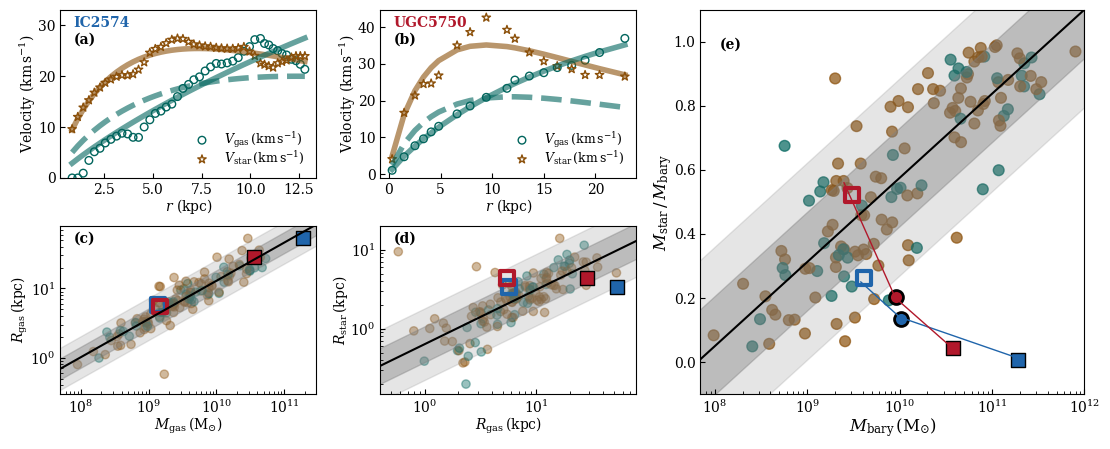

In [267]:
fig = plt.figure()
ax1 = fig.add_axes((1,0,0.6,0.8))
ax2 = fig.add_axes((0.,0.45,0.4,0.35))
ax4 = fig.add_axes((0.,0.00,0.4,0.35))
ax3 = fig.add_axes((0.5,0.45,0.4,0.35))
ax5 = fig.add_axes((0.5,0.00,0.4,0.35))

c1,c2 = blu,red

axs = [ax1,ax2,ax3,ax4,ax5]

for ax in axs:
    ax.tick_params(direction = 'in', which = 'both')
    
a_c1,a_c2 = bgn,brw
ax2.scatter(ic_r,ic_vg,marker = 'o',facecolor = 'none',edgecolor = a_c1,s = 30,label = '$V_{\mathrm{gas}}\,(\mathrm{km\,s^{-1}})$')
ax2.scatter(ic_r,ic_vs,marker = '*',facecolor = 'none',edgecolor = a_c2,s = 40,label = '$V_{\mathrm{star}}\,(\mathrm{km\,s^{-1}})$')
ax2.set_xlabel('$r$ (kpc)',size = 10,labelpad = 0)
ax2.set_ylabel('Velocity ($\mathrm{km\,s^{-1}}$)',size = 10,labelpad = 0)
ax2.plot(ic_r,pp.v_exp(ic_lmstar,ic_rdstar,ic_r),c = a_c2,ls = '-',lw = 4,alpha = 0.6)
ax2.plot(ic_r,pp.v_exp(ic_lmgas,ic_rdgas,ic_r),color = a_c1,ls = '-',lw = 4,alpha = 0.6)
ax2.plot(ic_r,pp.v_exp(ic_lmgas2,ic_rdgas2,ic_r),color = a_c1,ls = '--',lw = 4,alpha = 0.6)
ax2.set_ylim(0,33)
ax2.legend(framealpha = 0,labelspacing = 0,prop = {'size':9})
ax2.text(0.05,0.9,'IC2574',transform = ax2.transAxes,color = c1,weight = 'bold')
ax2.text(0.05,0.8,'(a)',transform = ax2.transAxes,color = 'k',weight = 'bold')

b_c1,b_c2 = a_c1,a_c2
ax3.scatter(ugc_r,ugc_vg,marker = 'o',facecolor = 'none',edgecolor = b_c1,s = 30,label = '$V_{\mathrm{gas}}\,(\mathrm{km\,s^{-1}})$')
ax3.scatter(ugc_r,ugc_vs,marker = '*',facecolor = 'none',edgecolor = b_c2,s = 40,label = '$V_{\mathrm{star}}\,(\mathrm{km\,s^{-1}})$')
ax3.set_xlabel('$r$ (kpc)',size = 10,labelpad = 0)
ax3.set_ylabel('Velocity ($\mathrm{km\,s^{-1}}$)',size = 10,labelpad = 0)
ax3.plot(ugc_r,pp.v_exp(ugc_lmstar,ugc_rdstar,ugc_r), c = b_c2, lw = 4,alpha = 0.6)
ax3.plot(ugc_r,pp.v_exp(ugc_lmgas,ugc_rdgas,ugc_r),c = b_c1,lw = 4,alpha = 0.6)
ax3.plot(ugc_r,pp.v_exp(ugc_lmgas2,ugc_rdgas2,ugc_r),c = b_c1,ls = '--',lw = 4,alpha = 0.6)
ax3.legend(framealpha = 0,labelspacing = 0,prop = {'size':9})
ax3.text(0.05,0.9,'UGC5750',transform = ax3.transAxes,color = c2,weight = 'bold')
ax3.text(0.05,0.8,'(b)',transform = ax3.transAxes,color = 'k',weight = 'bold')


ax4.scatter(sparc_mgas,sparc_rdgas,color=Clrs,alpha = 0.4)
ax4.plot(10**x1,10**y1, c = 'k')
ax4.fill_between(10**x1, 10**(y1-sig1), 10**(y1+sig1), color = 'grey', alpha = 0.4)
ax4.fill_between(10**x1, 10**(y1-2*sig1), 10**(y1+2*sig1), color = 'grey', alpha = 0.2)
ax4.scatter(10**ic_lmgas, ic_rdgas, marker = 's', color = c1, s = 100,edgecolor = 'k')
ax4.scatter(10**ic_lmgas2, ic_rdgas2, marker = 's', color = c1, s = 100,edgecolor = c1,lw = 3, facecolor = 'none')
ax4.scatter(10**ugc_lmgas, ugc_rdgas, marker = 's', color = c2, s = 100,edgecolor = 'k')
ax4.scatter(10**ugc_lmgas2, ugc_rdgas2, marker = 's', color = c2, s = 100,edgecolor = c2,lw = 3,facecolor = 'none')
# ax4.scatter(10**ic_lmgas3, ic_rdgas2, marker = 'o', color = c1, s = 100, edgecolor = 'k',lw = 2)
# ax4.scatter(10**ugc_lmgas3, ugc_rdgas2, marker = 'o', color = c2, s = 100, edgecolor = 'k',lw = 2)
ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.set_xlabel('$M_{\mathrm{gas}}\,(\mathrm{M_{\odot}})$',size = 10,labelpad = 0)
ax4.set_ylabel('$R_{\mathrm{gas}}\,\mathrm{(kpc)}$',size = 10, labelpad = 0)
ax4.set_xlim(5e7,3e11)
ax4.set_ylim(3e-1,8e1)
ax4.text(0.05,0.9,'(c)',transform = ax4.transAxes,color = 'k',weight = 'bold')

ax5.scatter(sparc_rdgas,sparc_rdstar,color = Clrs,alpha = 0.4)
ax5.plot(10**x2,10**y2, c = 'k')
ax5.fill_between(10**x2, 10**(y2-sig2), 10**(y2+sig2), color = 'grey', alpha = 0.4)
ax5.fill_between(10**x2, 10**(y2-2*sig2), 10**(y2+2*sig2), color = 'grey', alpha = 0.2)
ax5.scatter(ic_rdgas, ic_rdstar, marker = 's', color = c1, s = 100,edgecolor = 'k')
ax5.scatter(ic_rdgas2, ic_rdstar, marker = 's', color = c1, s = 100,edgecolor = c1,lw = 3,facecolor = 'none')
ax5.scatter(ugc_rdgas, ugc_rdstar, marker = 's', color = c2, s = 100,edgecolor = 'k')
ax5.scatter(ugc_rdgas2, ugc_rdstar, marker = 's', color = c2, s = 100,edgecolor = c2,lw = 3,facecolor = 'none')
ax5.set_xscale('log')
ax5.set_yscale('log')
ax5.set_xlabel('$R_{\mathrm{gas}}\,\mathrm{(kpc)}$',size = 10, labelpad = 0)
ax5.set_ylabel('$R_{\mathrm{star}}\,\mathrm{(kpc)}$',size = 10, labelpad = 0)
ax5.set_xlim(4e-1,8e1)
ax5.set_ylim(1.5e-1,2e1)
ax5.text(0.05,0.9,'(d)',transform = ax5.transAxes,color = 'k',weight = 'bold')

ax1.scatter(sparc_mbary,sparc_mstarbymbary, c=Clrs, alpha = 0.7,s = 60)
ax1.plot(10**x3,y3, c = 'k')
ax1.fill_between(10**x3, (y3-sig3), (y3+sig3), color = 'grey', alpha = 0.4)
ax1.fill_between(10**x3, (y3-2*sig3), (y3+2*sig3), color = 'grey', alpha = 0.2)
ax1.set_xscale('log')
ax1.set_xlabel('$M_{\mathrm{bary}}\,(\mathrm{M_{\odot}})$',size = 12,labelpad = 0)
ax1.set_ylabel('$M_{\mathrm{star}}\,/\,M_{\mathrm{bary}}$',size = 12,labelpad = 0)
ax1.set_xlim(7e7,1e12)
ax1.set_ylim(-0.1,1.1)
ic_yd = sparcd['lcdm']['IC2574']['core_fit']['yd'][0]
ic_mbary = ic_yd*10**ic_lmstar + 10**ic_lmgas
ugc_yd = sparcd['lcdm']['UGC05750']['core_fit']['yd'][0]
ugc_mbary = ugc_yd*10**ugc_lmstar + 10**ugc_lmgas
ax1.scatter(ic_mbary,ic_yd*10**ic_lmstar/ic_mbary,marker = 's', color = c1,s = 100, edgecolor = 'k',lw = 1)
ax1.scatter(ugc_mbary,ugc_yd*10**ugc_lmstar/ugc_mbary,marker = 's', color = c2,s = 100, edgecolor = 'k',lw = 1)
ic_mbary2 = ic_yd*10**ugc_lmstar + 10**ugc_lmgas2
ugc_mbary2 = ugc_yd*10**ugc_lmstar + 10**ugc_lmgas2
ax1.scatter(ic_mbary2,ic_yd*10**ic_lmstar/ic_mbary2,marker = 's',color = c1,s = 100, lw = 3,edgecolor = c1,facecolor = 'none')
ax1.scatter(ugc_mbary2,ugc_yd*10**ugc_lmstar/ugc_mbary2,marker = 's',color = c2,s = 100, lw = 3,edgecolor = c2,facecolor = 'none')
ic_mbary3 = ic_yd*10**ugc_lmstar3 + 10**ugc_lmgas3
ugc_mbary3 = ugc_yd*10**ugc_lmstar3 + 10**ugc_lmgas3
ax1.scatter(ic_mbary3,ic_yd*10**ic_lmstar3/ic_mbary3,marker = 'o',color = c1,s = 100, lw = 2,edgecolor = 'k')
ax1.scatter(ugc_mbary3,ugc_yd*10**ugc_lmstar3/ugc_mbary3,marker = 'o',color = c2,s = 100, lw = 2,edgecolor = 'k')
ax1.plot([3.8e9,1e10,2e11],[0.25,0.14,0.01],c = c1,lw = 1)
ax1.plot([2.5e9,9e9,3.5e10],[0.56,0.2,0.05],c = c2,lw = 1)
ax1.text(0.05,0.9,'(e)',transform = ax1.transAxes,color = 'k',weight = 'bold')


plt.savefig('../Output/diversity/fig6.pdf',bbox_inches = 'tight',dpi = 300)

In [287]:
pp.rho0_nfw(11.8,10)/1e9

0.025564414957128495

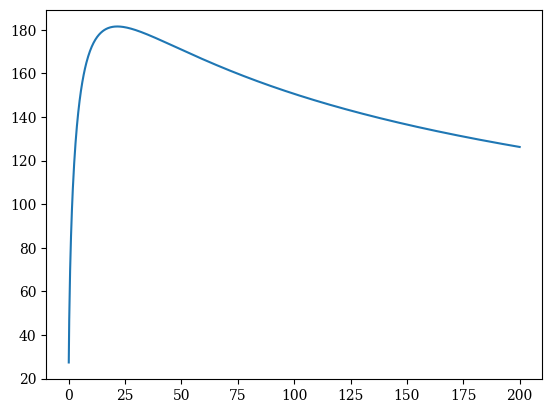

In [289]:
r = np.linspace(0.1,200, 1000)
plt.plot(r, pp.v_nfw(11.85,10.,r))